In [309]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [310]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [311]:
NUM_CLASSES = 24

# 学習データ読み込み

In [312]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [313]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [315]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [316]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_28 (Dropout)        (None, 42)                0         
                                                                 
 dense_42 (Dense)            (None, 20)                860       
                                                                 
 dropout_29 (Dropout)        (None, 20)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 24)                264       
                                                                 
Total params: 1334 (5.21 KB)
Trainable params: 1334 (5.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [317]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [318]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [319]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/53 [==============>...............] - ETA: 0s - loss: 3.1862 - accuracy: 0.0434 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
53/53 [==============================] - 2s 9ms/step - loss: 3.1682 - accuracy: 0.0553 - val_loss: 3.1042 - val_accuracy: 0.0994


C:\Users\joaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/1000
23/53 [============>.................] - ETA: 0s - loss: 3.1113 - accuracy: 0.0774
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
53/53 [==============================] - 0s 5ms/step - loss: 3.0903 - accuracy: 0.0869 - val_loss: 2.9885 - val_accuracy: 0.1434
Epoch 3/1000
28/53 [==============>...............] - ETA: 0s - loss: 2.9923 - accuracy: 0.1116
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
53/53 [==============================] - 0s 5ms/step - loss: 2.9554 - accuracy: 0.1186 - val_loss: 2.7786 - val_accuracy: 0.1888
Epoch 4/1000
29/53 [===============>..............] - ETA: 0s - loss: 2.7919 - accuracy: 0.1447
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
53/53 [==============================] - 0s 4ms/step - loss: 2.7584 - accuracy: 0.1481 - val_loss: 2.5412 - val_accuracy: 0.2473
Epoch 5/1000
30/53 [===============>..............] - ETA: 0s - loss: 2.6204 - accuracy: 0.1792
E

In [320]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

18/18 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.8687


In [321]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [322]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 139ms/step
[6.4940345e-05 5.7887845e-03 4.3310408e-07 5.0309827e-06 2.3835868e-02
 9.5587125e-04 3.5128469e-05 6.8774338e-05 8.7725330e-06 2.2725118e-03
 4.3097846e-03 2.2482059e-04 8.1977872e-03 9.1233960e-07 1.5303289e-07
 3.2929220e-05 1.1466714e-02 7.0638381e-02 3.4327701e-02 3.9143967e-03
 1.6068108e-02 4.1136179e-02 7.7664590e-01 1.1065233e-07]
22


# 混同行列

70/70 [==============================] - 0s 1ms/step


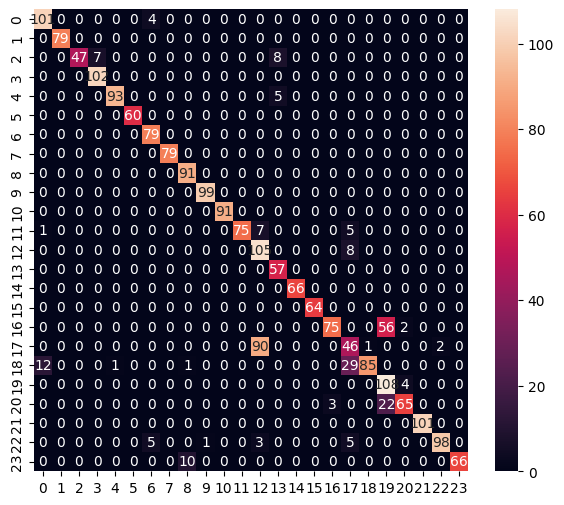

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       105
           1       1.00      1.00      1.00        79
           2       1.00      0.76      0.86        62
           3       0.94      1.00      0.97       102
           4       0.99      0.95      0.97        98
           5       1.00      1.00      1.00        60
           6       0.90      1.00      0.95        79
           7       1.00      1.00      1.00        79
           8       0.89      1.00      0.94        91
           9       0.99      1.00      0.99        99
          10       1.00      1.00      1.00        91
          11       1.00      0.85      0.92        88
          12       0.51      0.93      0.66       113
          13       0.81      1.00      0.90        57
          14       1.00      1.00      1.00        66
          15       1.00      1.00      1.00        64
          16       0.96      0.56      0.71       133
     

In [323]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [324]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\joaco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [325]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joaco\AppData\Local\Temp\tmpkupr906i\assets


INFO:tensorflow:Assets written to: C:\Users\joaco\AppData\Local\Temp\tmpkupr906i\assets


7504

# 推論テスト

In [326]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [327]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [328]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [329]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [330]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.49405338e-05 5.78879006e-03 4.33104873e-07 5.03099682e-06
 2.38358732e-02 9.55871656e-04 3.51285380e-05 6.87743377e-05
 8.77255843e-06 2.27251067e-03 4.30978881e-03 2.24820993e-04
 8.19779560e-03 9.12343012e-07 1.53033454e-07 3.29292197e-05
 1.14667090e-02 7.06384182e-02 3.43277268e-02 3.91439721e-03
 1.60681102e-02 4.11361642e-02 7.76645899e-01 1.10652735e-07]
22
